In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
data = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\eBird_Datasets\canada_warbler_PA_2010_2020.csv')

In [3]:
data.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Column1
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,2,NaN,...,3.0,1,NaN,0,1,0,NaN,"Richard Nugent, Melissa Little and Shannon Tho...",NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,1,NaN,...,13.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS334717588,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,X,NaN,...,NaN,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,1,NaN,...,6.0,1,G189385,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,8/6/2018 23:57,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,11,NaN,...,1.0,1,NaN,0,1,0,NaN,"Heavy rain early, starting in mid-morning wind...",NaN,NaN


In [4]:
for col in data.columns:
    print (col)

GLOBAL UNIQUE IDENTIFIER
LAST EDITED DATE
TAXONOMIC ORDER
CATEGORY
COMMON NAME
SCIENTIFIC NAME
SUBSPECIES COMMON NAME
SUBSPECIES SCIENTIFIC NAME
OBSERVATION COUNT
BREEDING BIRD ATLAS CODE
BREEDING BIRD ATLAS CATEGORY
AGE/SEX
COUNTRY
COUNTRY CODE
STATE
STATE CODE
COUNTY
COUNTY CODE
IBA CODE
BCR CODE
USFWS CODE
ATLAS BLOCK
LOCALITY
LOCALITY ID
LOCALITY TYPE
LATITUDE
LONGITUDE
OBSERVATION DATE
TIME OBSERVATIONS STARTED
OBSERVER ID
SAMPLING EVENT IDENTIFIER
PROTOCOL TYPE
PROTOCOL CODE
PROJECT CODE
DURATION MINUTES
EFFORT DISTANCE KM
EFFORT AREA HA
NUMBER OBSERVERS
ALL SPECIES REPORTED
GROUP IDENTIFIER
HAS MEDIA
APPROVED
REVIEWED
REASON
TRIP COMMENTS
SPECIES COMMENTS
Column1


<H>Create consolidated Data Frame </H>

In [5]:
data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.replace(' ', '_')

In [6]:
consolidated_data = data[['global_unique_identifier','common_name',
                                 'observation_count','county', 'county_code',
                                'locality', 'locality_id', 'locality_type',
                                'latitude', 'longitude', 'observation_date', 'observer_id', 'sampling_event_identifier']].copy()

In [7]:
consolidated_data.head()

,global_unique_identifier,common_name,observation_count,county,county_code,locality,locality_id,locality_type,latitude,longitude,observation_date,observer_id,sampling_event_identifier
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,Canada Warbler,2,Westmoreland,US-PA-129,Forbes SF--Wolf Rocks Trail,L1190288,H,40.128688,-79.186106,7/15/2010,obsr39944,S6642576
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,Canada Warbler,1,Lancaster,US-PA-071,"Pumping Station Rd., Lancaster Co.",L525352,P,40.242486,-76.336741,8/28/2010,obsr28990,S6820317
2,URN:CornellLabOfOrnithology:EBIRD:OBS334717588,Canada Warbler,X,Monroe,US-PA-089,Two Mile Run,L3827933,P,41.118060,-75.593330,7/25/2010,obsr642042,S24484186
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,8/26/2010,obsr229873,S6879373
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,Canada Warbler,11,Centre,US-PA-027,Black Moshannon SP,L1626028,H,40.901930,-78.060147,5/8/2010,obsr40533,S6387763


<h>Find total of missing values in each column, if any (none in this case)</h>

In [8]:
null_columns=consolidated_data.columns[consolidated_data.isnull().any()]

print(consolidated_data[null_columns].isnull().sum())

Series([], dtype: float64)


<h>Remove rows where 'species count' is equal to 'X'</h>

In [9]:
consolidated_data = consolidated_data[consolidated_data.observation_count != 'X']

<h>Convert observation_date column from strings to datetimes</h>

In [10]:
consolidated_data['observation_date'] =  pd.to_datetime(consolidated_data['observation_date'])

In [11]:
consolidated_data.head()

,global_unique_identifier,common_name,observation_count,county,county_code,locality,locality_id,locality_type,latitude,longitude,observation_date,observer_id,sampling_event_identifier
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,Canada Warbler,2,Westmoreland,US-PA-129,Forbes SF--Wolf Rocks Trail,L1190288,H,40.128688,-79.186106,2010-07-15,obsr39944,S6642576
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,Canada Warbler,1,Lancaster,US-PA-071,"Pumping Station Rd., Lancaster Co.",L525352,P,40.242486,-76.336741,2010-08-28,obsr28990,S6820317
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,2010-08-26,obsr229873,S6879373
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,Canada Warbler,11,Centre,US-PA-027,Black Moshannon SP,L1626028,H,40.901930,-78.060147,2010-05-08,obsr40533,S6387763
5,URN:CornellLabOfOrnithology:EBIRD:OBS97707699,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,2010-08-31,obsr41808,S6836218


<h>Visualization of sightings</h>

In [12]:
import matplotlib.pyplot as plt

In [13]:
consolidated_data['observation_count'] = pd.to_numeric(consolidated_data['observation_count'])

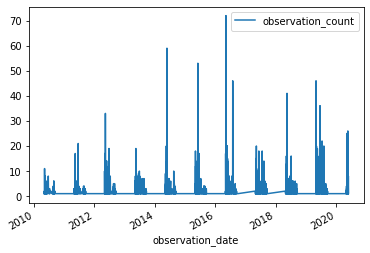

In [14]:
consolidated_data.plot(x='observation_date', y='observation_count')

Note how the plot above is does not give sum of data by date. See below for creating sum of sightings by month.

In [15]:
monthly_df = consolidated_data[['observation_date', 'observation_count']]

In [16]:
sightings_by_month = monthly_df.resample('M', on='observation_date').sum()

In [17]:
sightings_by_month.head()

,observation_count
observation_date,
2010-05-31,317
2010-06-30,42
2010-07-31,14
2010-08-31,104
2010-09-30,59


Must use 'reset_index' below because 'observation_date' got converted to the index when consolidated_data was resampled

In [18]:
sightings_by_month = sightings_by_month.reset_index()
sightings_by_month.head()

,observation_date,observation_count
0,2010-05-31,317
1,2010-06-30,42
2,2010-07-31,14
3,2010-08-31,104
4,2010-09-30,59


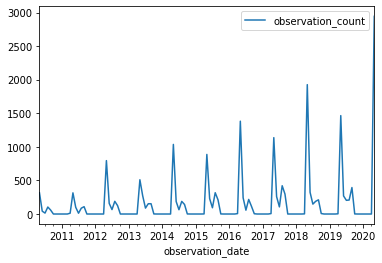

In [19]:
sightings_by_month.plot(x='observation_date', y='observation_count')

In [20]:
import matplotlib.dates as mdates

In [21]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

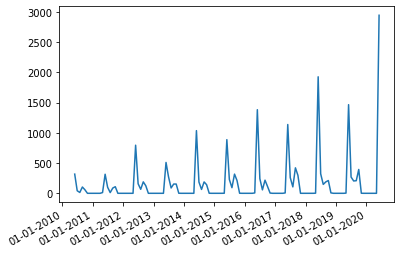

In [22]:
plt.figure()
plt.plot(sightings_by_month['observation_date'], sightings_by_month['observation_count'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

In the plot above, any more detail on the x-axis ticks would be tough to read. See below for other options.

In [23]:
import calendar
sightings_by_month['month'] = pd.DatetimeIndex(sightings_by_month['observation_date']).month
#sightings_by_month['month'] = sightings_by_month['month'].apply(lambda x: calendar.month_abbr[x])
sightings_by_month['year'] = pd.DatetimeIndex(sightings_by_month['observation_date']).year
sightings_by_month.head()

,observation_date,observation_count,month,year
0,2010-05-31,317,5,2010
1,2010-06-30,42,6,2010
2,2010-07-31,14,7,2010
3,2010-08-31,104,8,2010
4,2010-09-30,59,9,2010


Created a new dataframe only containing observation date and observation count. 

Added columns for month and year to make it easier to group into a list of dataframes, as shown below.

In [24]:
DFList = []
for group in sightings_by_month.groupby(sightings_by_month['year']):
    DFList.append(group[1])
    

print(DFList[9])

    observation_date  observation_count  month  year
104       2019-01-31                  0      1  2019
105       2019-02-28                  0      2  2019
106       2019-03-31                  0      3  2019
107       2019-04-30                  3      4  2019
108       2019-05-31               1465      5  2019
109       2019-06-30                269      6  2019
110       2019-07-31                204      7  2019
111       2019-08-31                208      8  2019
112       2019-09-30                394      9  2019
113       2019-10-31                  1     10  2019
114       2019-11-30                  0     11  2019
115       2019-12-31                  0     12  2019


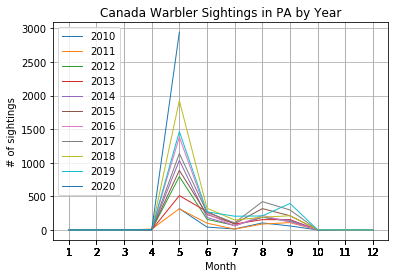

In [25]:
from matplotlib.pyplot import figure

plt.figure()
for i in DFList:
    year = i.iat[0, 3] # fast access for scalar values to access a 'year' value in the DF
    plt.plot(i['month'], i['observation_count'], linewidth=1, label = year)
    plt.grid(True)
    

plt.title("Canada Warbler Sightings in PA by Year", loc='center', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Month")
plt.ylabel("# of sightings")
    

plt.legend(loc="upper left")

plt.xticks(sightings_by_month['month'])
ax = plt.gca()

plt.show()

Above, a multi-line plot of sightings by year was created by iterating through the list of dataframes.

Below, adding observer_id and global_unique_ID to determine if more observers/checklists are correlated with the uptick

First, let's find the total number of unique birders that saw Canada Warblers from 2010-2020

In [26]:
n_birders_total = consolidated_data['observer_id'].nunique()
print(n_birders_total)

1848


Now, let's create a new dataframe by grouping observer_id by year and finding the number of unique birders each year that saw Canada Warblers. 

In [27]:
consolidated_data['year'] = pd.DatetimeIndex(consolidated_data['observation_date']).year

In [28]:
yearly_unique_birders_cw = consolidated_data.groupby('year')['observer_id'].nunique().reset_index()
yearly_unique_birders_cw = yearly_unique_birders_cw.rename(columns={"observer_id": "unique_observer_count_cw"})
yearly_unique_birders_cw.head()

,year,unique_observer_count_cw
0,2010,117
1,2011,141
2,2012,245
3,2013,277
4,2014,390


For convenience, I used Excel to transform the 8GB data file containing all eBird data for PA from 2010-2020 in order to obtain a table containing only unique observer_id values for each year (how many birders logged data that year).

We need this data to assess how many birders logged data each year vs how many birders logged canada warbler sightings each year. In doing so, we can determine if the increase in birders correlates with the increase in canada warbler sightings.

In [29]:
yearly_unique_birders_all_df = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\unique_observer_id_per_year.csv')
yearly_unique_birders_all_df.columns = [x.lower() for x in yearly_unique_birders_all_df.columns]
yearly_unique_birders_all_df.columns = yearly_unique_birders_all_df.columns.str.replace(' ', '_')
yearly_unique_birders_all_df.head()

,observation_date,observer_id
0,1/1/2010,obsr110959
1,1/1/2010,obsr117538
2,1/1/2010,obsr215041
3,1/1/2010,obsr439989
4,1/1/2010,obsr23245


Ok, now let's create a column for the year slice of the date

In [30]:
yearly_unique_birders_all_df['year'] = pd.DatetimeIndex(yearly_unique_birders_all_df['observation_date']).year

In [31]:
yearly_unique_birders_all_df.head()

,observation_date,observer_id,year
0,1/1/2010,obsr110959,2010.0
1,1/1/2010,obsr117538,2010.0
2,1/1/2010,obsr215041,2010.0
3,1/1/2010,obsr439989,2010.0
4,1/1/2010,obsr23245,2010.0


In [32]:
yearly_unique_birders_all = yearly_unique_birders_all_df.groupby('year')['observer_id'].nunique().reset_index()
yearly_unique_birders_all['year'] = yearly_unique_birders_all['year'].astype(int).replace('\.0', '', regex=True)
yearly_unique_birders_all = yearly_unique_birders_all.rename(columns={"observer_id": "unique_observer_count_overall"})
yearly_unique_birders_all.head()

,year,unique_observer_count_overall
0,2010,1427
1,2011,1758
2,2012,2459
3,2013,3231
4,2014,3884


Now that we have two dataframes describing the number of birders who logged data TOTAL as well as the number of birders who logged data for canada warblers, we can combine into a singular dataset and plot against each other...

In [33]:
yearly_unique_birders_all['unique_observer_count_cw'] = yearly_unique_birders_cw['unique_observer_count_cw']
yearly_unique_birders_all.head()

,year,unique_observer_count_overall,unique_observer_count_cw
0,2010,1427,117
1,2011,1758,141
2,2012,2459,245
3,2013,3231,277
4,2014,3884,390


<Figure size 3600x4000 with 0 Axes>

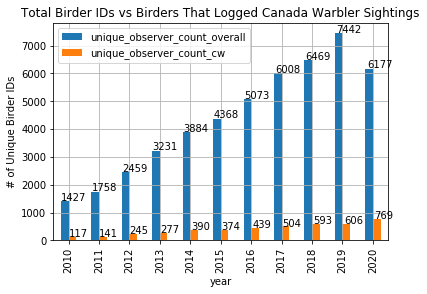

In [34]:
fig = plt.figure(figsize=(18, 20), dpi= 200, facecolor='w', edgecolor='k')
ax2 = ax.twinx()

ax = yearly_unique_birders_all.plot.bar(x="year", y=["unique_observer_count_overall", "unique_observer_count_cw"])
ax.plot(figsize=(20,5))
plt.title("Total Birder IDs vs Birders That Logged Canada Warbler Sightings", loc='center', fontsize=12, fontweight=0, color='Black')
plt.ylabel("# of Unique Birder IDs")
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Now we have a visual of how many individual birders logged Canada Warbler out of all birders overall. 

Let's dig into the total number of checklists. Because the original data file with all Pennsylvania sightings is so large, I did some work on the backend (transform function in Excel) and got the total number of checklists to be 1492336. 

2010: 31491
2011: 43218
2012: 79499
2013: 99097
2014: 118810
2015: 135292
2016: 160744
2017: 184693
2018: 218904
2019: 247787
2020: 172800

In [44]:
yearly_sampling_events_overall = [[2010, 31491], [2011, 43218], [2012, 79499],
                                 [2013, 99097], [2014, 118810], [2015, 135292],
                                 [2016, 160744], [2017, 184693], [2018, 218904],
                                 [2019, 247787], [2020, 172800]]
  
yearly_sampling_events_overall = pd.DataFrame(yearly_sampling_events_overall, columns = ['year', 'sampling_events_total']) 


Getting the total number of sampling events capturing canada warbler using the same logic as we did for unique birders:

In [45]:
yearly_sampling_events_cw = consolidated_data.groupby('year')['sampling_event_identifier'].nunique().reset_index()
yearly_sampling_events_cw = yearly_sampling_events_cw.rename(columns={"sampling_event_identifier": "sampling_events_cw"})
yearly_sampling_events_cw.head()

,year,sampling_events_cw
0,2010,305
1,2011,372
2,2012,733
3,2013,669
4,2014,995


Then merge the sample event dataframes into one...

In [47]:
yearly_sampling_events_overall['yearly_sampling_events_cw'] = yearly_sampling_events_cw['sampling_events_cw']
yearly_sampling_events_overall.head()

,year,sampling_events_total,yearly_sampling_events_cw
0,2010,31491,305
1,2011,43218,372
2,2012,79499,733
3,2013,99097,669
4,2014,118810,995


Text(0, 0.5, 'sampling events w. Canada Warbler')

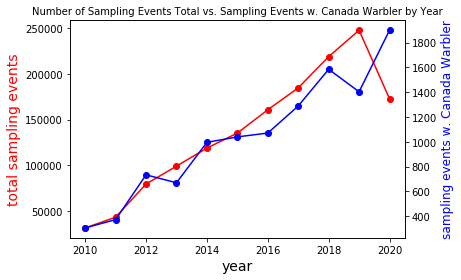

In [70]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title('Number of Sampling Events Total vs. Sampling Events w. Canada Warbler by Year',
         loc='center', fontsize=10, fontweight=0, color='Black')
plt.ylabel("# of Unique Birder IDs")
# make a plot
ax.plot(yearly_sampling_events_overall.year, yearly_sampling_events_overall.sampling_events_total, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("total sampling events",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(yearly_sampling_events_overall.year, yearly_sampling_events_overall["yearly_sampling_events_cw"],color="blue",marker="o")
ax2.set_ylabel("sampling events w. Canada Warbler",color="blue",fontsize=12)

This is interesting for a few reasons. Firstly, the 2020 data only goes up until June (when the data was extracted from eBird for use in this analysis). While the total number of eBird sampling events dips in 2020 to reflect this, the total number of eBird sampling events where Canada Warblers were spotted continues to rise, and 2020 is only halfway over!